<a href="https://colab.research.google.com/github/EinarLop/computational_intelligence_TC3023/blob/main/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Un padre varios hijos sin traslape



In [ ]:
import numpy as np
import logging
import math

class OPMC:
    def __init__(self, iterations=10, n_children=3):
        self.iter = iterations
        self.n_children = n_children
        # Generate random solutions. For multiple parents and multiple variables, 
        self.parent = [np.random.uniform(low=-32.786, high=32.786, size=None), np.random.uniform(low=-32.786, high=32.786, size=None)] 
        # Save the best initial solution. Since there is only one parent, no selection is required.
        self.best_iter = [self.parent]
        # Save the evaluation of the best solution.
        self.evaluaciones = [self.eval_func(self.parent)]

        # Get the logger.
        self.logger = logging.getLogger(__name__)
        self.logger.info('Initializing algorithm with parent {} and {} children'.format(self.parent, self.n_children))

    def eval_func(self, x):
        """
        Function to evaluate a solution.
        """
        a = 20
        b = 0.2
        c = 2* math.pi
        d = np.shape(x)[0]
        first_summation = 0
        second_summation = 0

        for i in range(d):
          xi = x[i]
          first_summation += xi**2 
          second_summation += math.cos(c*xi)

        ackley = -a*math.exp(-b* math.sqrt((1/d)*first_summation)) - math.exp((1/d)*second_summation) + a + math.exp(1)
        return ackley

    def evaluate(self, children):
        """
        Function that takes multiple solutions and evaluates each of them.
        """
        return list(map(self.eval_func, children))

    def mutation(self):
        """
        Function that generates childrens from a single parent. 
        """
        children = []
        for i in range(self.n_children):
          current_child = np.clip([self.parent[0] + (-1) ** np.random.randint(0, 2) * np.random.random() , self.parent[1] + (-1) ** np.random.randint(0, 2) * np.random.random()], 0,5)
          children.append(current_child)
        return children 

    def run(self):
        counter = 0
        for _ in range(self.iter):
            # Generate children from one parent.
            children = self.mutation()
            self.logger.debug('Children are {}.'.format(children))
            # Evaluate all children.
            evaluations = self.evaluate(children)
            self.logger.debug('Evaluations are {}.'.format(evaluations))
            # Select the children with the lowest evaluation.
         
            self.parent = children[np.argsort(evaluations)[0]]
   
            # Save the best solution of the iteration.
            self.best_iter.append(self.parent)

            # Save the best evaluation of the iteration.
            self.evaluaciones.append(self.eval_func(self.parent))
            self.logger.info('New Parent is {} with f(x)={}.'.format(self.parent, self.evaluaciones[-1]))
            counter += 1

        return self.best_iter


#Un padre varios hijos con traslape



In [ ]:
import numpy as np
import logging
import math

class OPMCO:
    def __init__(self, iterations=10, n_children=3):
        self.iter = iterations
        self.n_children = n_children
        # Generate random solutions. For multiple parents and multiple variables, 
        self.parent = [np.random.uniform(low=-32.786, high=32.786, size=None), np.random.uniform(low=-32.786, high=32.786, size=None)] 
        # Save the best initial solution. Since there is only one parent, no selection is required.
        self.best_iter = [self.parent]
        # Save the evaluation of the best solution.
        self.evaluaciones = [self.eval_func(self.parent)]

        # Get the logger.
        self.logger = logging.getLogger(__name__)
        self.logger.info('Initializing algorithm with parent {} and {} children'.format(self.parent, self.n_children))

    def eval_func(self, x):
        """
        Function to evaluate a solution.
        """
        a = 20
        b = 0.2
        c = 2* math.pi
        d = np.shape(x)[0]
        first_summation = 0
        second_summation = 0

        for i in range(d):
          xi = x[i]
          first_summation += xi**2 
          second_summation += math.cos(c*xi)

        ackley = -a*math.exp(-b* math.sqrt((1/d)*first_summation)) - math.exp((1/d)*second_summation) + a + math.exp(1)
        return ackley

    def evaluate(self, children):
        """
        Function that takes multiple solutions and evaluates each of them.
        """
        return list(map(self.eval_func, children))

    def mutation(self):
        """
        Function that generates childrens from a single parent. 
        """
        children = []
        for i in range(self.n_children):
          current_child = np.clip([self.parent[0] + (-1) ** np.random.randint(0, 2) * np.random.random() , self.parent[1] + (-1) ** np.random.randint(0, 2) * np.random.random()], 0,5)
          children.append(current_child)
        return children 

    def run(self):
        counter = 0
        for _ in range(self.iter):
            # Generate children from one parent.
            children = self.mutation()
            print("Children" , children)

            self.logger.debug('Children are {}.'.format(children))
            # Evaluate all children.
            children.append(self.parent)
            evaluations = self.evaluate(children) 
            self.logger.debug('Evaluations are {}.'.format(evaluations))
            # Select the children with the lowest evaluation.
         
            self.parent = children[np.argsort(evaluations)[0]]
   
            # Save the best solution of the iteration.
            self.best_iter.append(self.parent)

            # Save the best evaluation of the iteration.
            self.evaluaciones.append(self.eval_func(self.parent))
            self.logger.info('New Parent is {} with f(x)={}.'.format(self.parent, self.evaluaciones[-1]))
            counter += 1

        return self.best_iter


#Varios padres varios hijos sin traslape



In [ ]:
import numpy as np
import logging
import math

class MPMC:
    def __init__(self, iterations=10, n_children=10, n_parents=4):
        self.iter = iterations
        self.n_children = n_children
        self.n_parents = n_parents
        # Generate random solutions. For multiple parents and multiple variables, 
        self.parent = []
        for _ in range(n_parents):
         self.parent.append([np.random.uniform(low=-32.786, high=32.786, size=None), np.random.uniform(low=-32.786, high=32.786, size=None)]) 
        # Save the best initial solution. Since there is only one parent, no selection is required.
        self.best_iter = [self.parent[0]] # Cambiar 
        # Save the evaluation of the best solution.
        #self.evaluaciones = [self.eval_func(self.parent[0])]
        self.evaluaciones = []
        # currentEvaluaciones = []
        # for i in range(np.shape(self.parent)[0]):
        #     currentEvaluaciones.append(self.eval_func(self.parent[i]))
        # self.evaluaciones.append(currentEvaluaciones)
        self.evaluaciones.append(self.eval_func(self.parent[0]))
            
        # Get the logger.
        self.logger = logging.getLogger(__name__)
        self.logger.info('Initializing algorithm with parent {} and {} children'.format(self.parent, self.n_children))

    def eval_func(self, x):
        """
        Function to evaluate a solution.
        """
        a = 20
        b = 0.2
        c = 2* math.pi
        d = np.shape(x)[0]
        first_summation = 0
        second_summation = 0

        for i in range(d):
          xi = x[i]
          first_summation += xi**2 
          second_summation += math.cos(c*xi)

        ackley = -a*math.exp(-b* math.sqrt((1/d)*first_summation)) - math.exp((1/d)*second_summation) + a + math.exp(1)
        return ackley

    def evaluate(self, children):
        """
        Function that takes multiple solutions and evaluates each of them.
        """
        return list(map(self.eval_func, children))

    def mutation(self):
        """
        Function that generates childrens from a single parent. 
        """
        children = []

        random_parent_index = np.random.randint(self.n_parents)
        for i in range(self.n_children):
          current_child = np.clip([self.parent[random_parent_index][0] + (-1) ** np.random.randint(0, 2) * np.random.random() , self.parent[random_parent_index][1] + (-1) ** np.random.randint(0, 2) * np.random.random()], 0,5)
          children.append(current_child)
        return children 

    def run(self):
        counter = 0
        for _ in range(self.iter):
            # Generate children from one parent.
            children = self.mutation()
            self.logger.debug('Children are {}.'.format(children))
            # Evaluate all children.
            evaluations = self.evaluate(children) 
            self.logger.debug('Evaluations are {}.'.format(evaluations))
            # Select the children with the lowest evaluation.

          

            self.parent = []
            current_n_parents_indices = np.argsort(evaluations)[0:self.n_parents]
            for i in range(self.n_parents):
              self.parent.append(children[current_n_parents_indices[i]])
   
            # Save the best solution of the iteration.
            self.best_iter.append(self.parent)

            # Save the best evaluation of the iteration.

            
            currentEvaluaciones = []
            for i in range(np.shape(self.parent)[0]):
              currentEvaluaciones.append(self.eval_func(self.parent[i]))
            self.evaluaciones.append(currentEvaluaciones)
           
            self.logger.info('New Parent is {} with f(x)={}.'.format(self.parent, self.evaluaciones[-1]))
            counter += 1

        return self.best_iter


# Varios padres varios hijos con traslape

In [ ]:
import numpy as np
import logging
import math

class MPMCO:
    def __init__(self, iterations=10, n_children=10, n_parents=1, overlap=True):
        self.iter = iterations
        self.n_children = n_children
        self.n_parents = n_parents
        self.overlap = overlap
        # Generate random solutions. For multiple parents and multiple variables, 
        self.parent = []
        for _ in range(n_parents):
         self.parent.append([np.random.uniform(low=-32.786, high=32.786, size=None), np.random.uniform(low=-32.786, high=32.786, size=None)]) 
        # Save the best initial solution. Since there is only one parent, no selection is required.

        initial_evaluations = []
        for i in range(np.shape(self.parent)[0]):
          initial_evaluations.append(self.eval_func(self.parent[i]))
        best_evaluation_index = np.argmin(initial_evaluations)



        self.best_iter = [self.parent] # Cambiar 
        # Save the evaluation of the best solution.
        #self.evaluaciones = [self.eval_func(self.parent[0])]
        self.evaluaciones = []
        # currentEvaluaciones = []
        # for i in range(np.shape(self.parent)[0]):
        #     currentEvaluaciones.append(self.eval_func(self.parent[i]))
        # self.evaluaciones.append(currentEvaluaciones)
        self.evaluaciones.append(initial_evaluations[best_evaluation_index])
       
            
        # Get the logger.
        self.logger = logging.getLogger(__name__)
        self.logger.info('Initializing algorithm with parent {} and {} children'.format(self.parent, self.n_children))

    def eval_func(self, x):
        """
        Function to evaluate a solution.
        """
        a = 20
        b = 0.2
        c = 2* math.pi
        d = np.shape(x)[0]
        first_summation = 0
        second_summation = 0

        for i in range(d):
          xi = x[i]
          first_summation += xi**2 
          second_summation += math.cos(c*xi)

        ackley = -a*math.exp(-b* math.sqrt((1/d)*first_summation)) - math.exp((1/d)*second_summation) + a + math.exp(1)
        return ackley

    def evaluate(self, children):
        """
        Function that takes multiple solutions and evaluates each of them.
        """
        return list(map(self.eval_func, children))

    def mutation(self):
        """
        Function that generates childrens from a single parent. 
        """
        children = []

        random_parent_index = np.random.randint(self.n_parents)
        for i in range(self.n_children):
          current_child = np.clip([self.parent[random_parent_index][0] + (-1) ** np.random.randint(0, 2) * np.random.random() , self.parent[random_parent_index][1] + (-1) ** np.random.randint(0, 2) * np.random.random()], 0,5)
          children.append(current_child)
        return children 

    def run(self):
        counter = 0
        for _ in range(self.iter):
            # Generate children from one parent.
            children = self.mutation()
            self.logger.debug('Children are {}.'.format(children))
            # Evaluate all children.
      
            if self.overlap:
              children = np.concatenate((children, self.parent), axis=0)
         
            
            evaluations = self.evaluate(children) 
            self.logger.debug('Evaluations are {}.'.format(evaluations))
            # Select the children with the lowest evaluation.

          

            self.parent = []
            current_n_parents_indices = np.argsort(evaluations)[0:self.n_parents]
            for i in range(self.n_parents):
              self.parent.append(children[current_n_parents_indices[i]])
   
            # Save the best solution of the iteration.
            self.best_iter.append(self.parent)
            print("evaaaaaaa", self.evaluaciones)

            # Save the best evaluation of the iteration.
            self.evaluaciones.append(self.eval_func(self.parent[0]))
           
            self.logger.info('New Parent is {} with f(x)={}.'.format(self.parent, self.evaluaciones[-1]))
            counter += 1

        return self.best_iter


#Resultados


evaaaaaaa [6.599421779943434]
evaaaaaaa [6.599421779943434, 12.642411176571153]
evaaaaaaa [6.599421779943434, 12.642411176571153, 11.91468842579655]
evaaaaaaa [6.599421779943434, 12.642411176571153, 11.91468842579655, 11.316606221715208]
evaaaaaaa [6.599421779943434, 12.642411176571153, 11.91468842579655, 11.316606221715208, 11.155944962367924]
evaaaaaaa [6.599421779943434, 12.642411176571153, 11.91468842579655, 11.316606221715208, 11.155944962367924, 10.18829541430857]
evaaaaaaa [6.599421779943434, 12.642411176571153, 11.91468842579655, 11.316606221715208, 11.155944962367924, 10.18829541430857, 8.948744389073742]
evaaaaaaa [6.599421779943434, 12.642411176571153, 11.91468842579655, 11.316606221715208, 11.155944962367924, 10.18829541430857, 8.948744389073742, 9.041566380721816]
evaaaaaaa [6.599421779943434, 12.642411176571153, 11.91468842579655, 11.316606221715208, 11.155944962367924, 10.18829541430857, 8.948744389073742, 9.041566380721816, 6.820275141898245]
evaaaaaaa [6.59942177994343

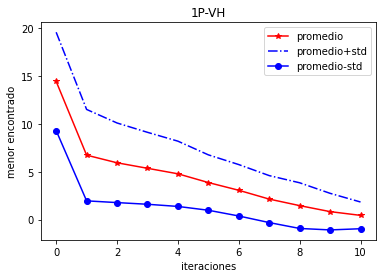

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

logging.basicConfig(level=logging.ERROR, format='%(asctime)s -%(levelname)s - %(funcName)s -  %(message)s')

logging.getLogger("matplotlib").setLevel(logging.WARNING)

df_experimentos = pd.DataFrame()
experimentos = 10

def poner_menor(row):
    # Un padre
    df.at[row.name, 'menor'] = min(row['evaluacion'], df.iloc[row.name - 1].menor)
    
    # Varios padres
    #df.at[row.name, 'menor'] = min(row['evaluacion'][0], df.iloc[row.name - 1].menor)
    return None

for experimento in range(1, experimentos + 1):
 
  # algoritmo = OPMC(iterations=20, n_children=10)
  # algoritmo = OPMCO(iterations=20, n_children=10)
  # algoritmo = MPMC(iterations=10, n_children=10, n_parents=4)
    algoritmo = MPMCO(iterations=10, n_children=100, n_parents=10, overlap=False)
    


    mejores = algoritmo.run()

    # You can access all variables from a class by using the class.name_of_variable
    evaluaciones = algoritmo.evaluaciones
    cantidad = len(mejores)
    logger = logging.getLogger()
    logger.info('Experimento ' + str(experimento))
    logger.info('Cantidad de soluciones {}.'.format(cantidad))
    logger.info('Cantidad de evaluaciones {}.'.format(len(evaluaciones)))

    # Create a dataframe. It is like an excel spreadsheet.
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_colwidth', None)
    pd.set_option('display.max_rows', None)
    df = pd.DataFrame(
        {'algoritmo':[algoritmo.__class__.__name__] * cantidad,
         'experimento':[experimento]*cantidad,
         'iteracion':list(range(0, cantidad)),
         'x':mejores,
         'evaluacion':evaluaciones
         }
    )
    
    # The first row has the lowest value so far.
    # Un padre
    df.at[0, 'menor'] = df.loc[0]['evaluacion'] 
    
    # Varios padres
    # df.at[0, 'menor'] = df.loc[0]['evaluacion'][0]

    # For each row, compare the evaluation of the current row and the previous smallest value to find which is smaller.
    df.loc[1:].apply(lambda row: poner_menor(row), axis=1)

    logger.info('\n'+df.to_string())
    df_experimentos = df_experimentos.append(df)

df_experimentos.reset_index(drop=True, inplace=True)
print(df_experimentos)

# Calculate the average best evaluation per iteration.
resultados = df_experimentos.groupby('iteracion').agg({'menor': ['mean', 'std']})

print(resultados)

promedios = resultados['menor']['mean'].values
std = resultados['menor']['std'].values
# Plot the average best evaluation for all experiments

plt.plot(promedios, color='red', marker='*')
plt.plot(promedios+std, color='b', linestyle='-.')
plt.plot(promedios-std, color='b', marker='o')
plt.xlabel('iteraciones')
plt.ylabel('menor encontrado')
plt.legend(['promedio', 'promedio+std','promedio-std'])
plt.title('1P-VH')
# Plot the evaluations for all experiments
#for experimento in range(1, experimentos + 1):
#  plt.plot(df_experimentos[df_experimentos.experimento==experimento].evaluacion.values)
plt.show()


#x n pares
#evaluacion n valores
#menor solo un valor

# Código Base

In [ ]:
import numpy as np
import logging
import math

class UnPadreVariosHijos:

    def __init__(self, iterations=10, n_children=3):
        self.iter = iterations
        self.n_children = n_children
        # Generate random solutions. For multiple parents and multiple variables, 
        self.parent = np.random.uniform(low=0.0, high=5.0, size=None)

        # Save the best initial solution. Since there is only one parent, no selection is required.
        self.best_iter = [self.parent]
        # Save the evaluation of the best solution.
        self.evaluaciones = [self.eval_func(self.parent)]

        print()
        # Get the logger.
        self.logger = logging.getLogger(__name__)
        self.logger.info('Initializing algorithm with parent {} and {} children'.format(self.parent, self.n_children))

    def eval_func(self, x):
        """
        Function to evaluate a solution.
        """
        return x**3-2*x**2+1


    def evaluate(self, children):
        """
        Function that takes multiple solutions and evaluates each of them.
        """
        return list(map(self.eval_func, children))

    def mutation(self):
        """
        Function that generates childrens from a single parent. 
        """
        children = self.parent + (-1) ** np.random.randint(0, 2) * np.random.random_sample(size=self.n_children)
        return np.clip(children, 0, 5)

    def run(self):
        counter = 0
        for _ in range(self.iter):
            # Generate children from one parent.
            children = self.mutation()
            self.logger.debug('Children are {}.'.format(children))
            # Evaluate all children.
            evaluations = self.evaluate(children)
            self.logger.debug('Evaluations are {}.'.format(evaluations))
            # Select the children with the lowest evaluation.
            self.parent = children[np.argmin(evaluations)]
            # Save the best solution of the iteration.
            self.best_iter.append(self.parent)

            # Save the best evaluation of the iteration.
            self.evaluaciones.append(self.eval_func(self.parent))
            self.logger.info('New Parent is {} with f(x)={}.'.format(self.parent, self.evaluaciones[-1]))
            counter += 1

        return self.best_iter












              algoritmo  experimento  iteracion         x  evaluacion  \
0    UnPadreVariosHijos            1          0  4.990701   75.489680   
1    UnPadreVariosHijos            1          1  4.153338   38.145561   
2    UnPadreVariosHijos            1          2  4.188702   39.401259   
3    UnPadreVariosHijos            1          3  4.426928   48.562198   
4    UnPadreVariosHijos            1          4  4.693859   60.351923   
5    UnPadreVariosHijos            1          5  3.904335   30.029367   
6    UnPadreVariosHijos            1          6  4.130030   37.332236   
7    UnPadreVariosHijos            1          7  4.459086   49.895099   
8    UnPadreVariosHijos            1          8  4.471549   50.417993   
9    UnPadreVariosHijos            1          9  4.577346   55.000781   
10   UnPadreVariosHijos            1         10  3.610781   22.000935   
11   UnPadreVariosHijos            1         11  2.639172    5.451977   
12   UnPadreVariosHijos            1     

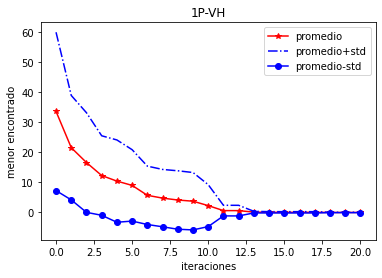

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

logging.basicConfig(level=logging.ERROR, format='%(asctime)s -%(levelname)s - %(funcName)s -  %(message)s')

logging.getLogger("matplotlib").setLevel(logging.WARNING)

df_experimentos = pd.DataFrame()
experimentos = 10

def poner_menor(row):
    df.at[row.name, 'menor'] = min(row['evaluacion'], df.iloc[row.name - 1].menor)
    return None

for experimento in range(1, experimentos + 1):
    algoritmo = UnPadreVariosHijos(iterations=20, n_children=4)
    

    mejores = algoritmo.run()

    # You can access all variables from a class by using the class.name_of_variable
    evaluaciones = algoritmo.evaluaciones
    cantidad = len(mejores)
    logger = logging.getLogger()
    logger.info('Experimento ' + str(experimento))
    logger.info('Cantidad de soluciones {}.'.format(cantidad))
    logger.info('Cantidad de evaluaciones {}.'.format(len(evaluaciones)))

    # Create a dataframe. It is like an excel spreadsheet.
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_colwidth', None)
    pd.set_option('display.max_rows', None)
    df = pd.DataFrame(
        {'algoritmo':[algoritmo.__class__.__name__] * cantidad,
         'experimento':[experimento]*cantidad,
         'iteracion':list(range(0, cantidad)),
         'x':mejores,
         'evaluacion':evaluaciones}
    )
    
    # The first row has the lowest value so far.
    df.at[0, 'menor'] = df.loc[0]['evaluacion']

    # For each row, compare the evaluation of the current row and the previous smallest value to find which is smaller.
    df.loc[1:].apply(lambda row: poner_menor(row), axis=1)

    logger.info('\n'+df.to_string())
    df_experimentos = df_experimentos.append(df)

df_experimentos.reset_index(drop=True, inplace=True)
print(df_experimentos)

# Calculate the average best evaluation per iteration.
resultados = df_experimentos.groupby('iteracion').agg({'menor': ['mean', 'std']})

print(resultados)

promedios = resultados['menor']['mean'].values
std = resultados['menor']['std'].values
# Plot the average best evaluation for all experiments

plt.plot(promedios, color='red', marker='*')
plt.plot(promedios+std, color='b', linestyle='-.')
plt.plot(promedios-std, color='b', marker='o')
plt.xlabel('iteraciones')
plt.ylabel('menor encontrado')
plt.legend(['promedio', 'promedio+std','promedio-std'])
plt.title('1P-VH')
# Plot the evaluations for all experiments
#for experimento in range(1, experimentos + 1):
#  plt.plot(df_experimentos[df_experimentos.experimento==experimento].evaluacion.values)
plt.show()
